# Prediction using Decision Tree  Algorithm on Iris Dataset

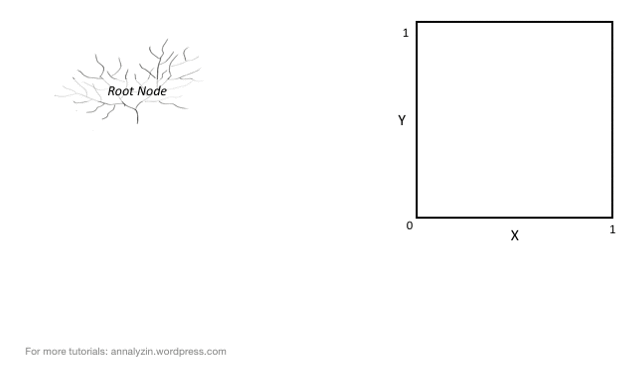

# 1. Workflow

**Iris Data ---> Preprocessing --->Exploring ---> Building Model ---> Evaluation->Decision Tree Graph Plotting**

# 2. What is Decision Tree ?

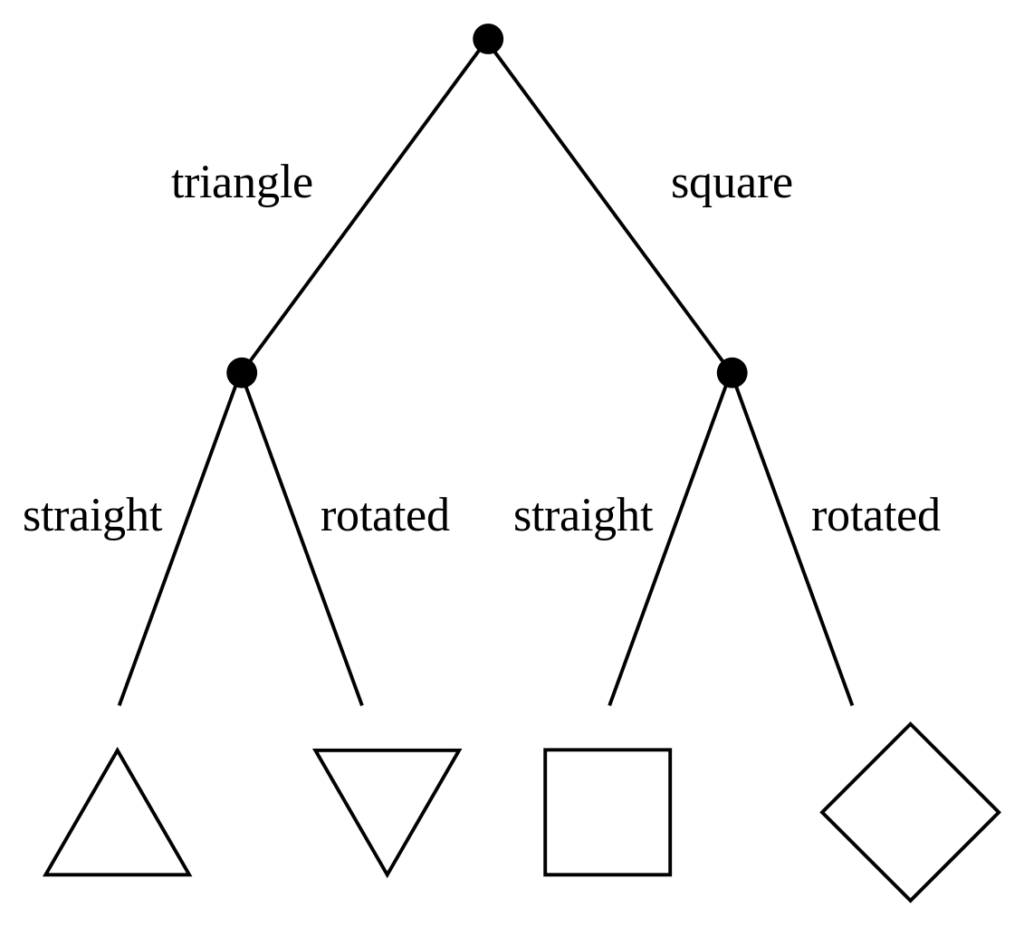

## A decision tree is a diagram or chart that helps determine a course of action or show a statistical probability.
## Starting from the decision itself (called a "node"), each "branch" of the decision tree represents a possible decision, outcome, or reaction.

## Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter.

## An example of a decision tree can be explained using above binary tree.

# This is how Iris Versicolor / Setosa / Virgnica looks like:

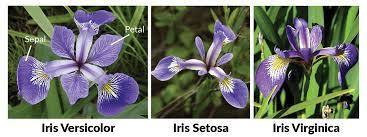

# 3. Importing Library

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# 4. Loading Dataset

In [87]:
dataframe = pd.read_csv("/content/Iris.csv")

In [88]:
dataframe.shape

(150, 6)

In [89]:
dataframe.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [90]:
dataframe.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [91]:
dataframe['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [92]:
del dataframe['Id']

In [93]:
dataframe

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [94]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [95]:
dataframe.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 5. Visualization of Data

In [96]:
## Checking for null values
sum(dataframe["SepalLengthCm"].isnull())

0

In [97]:
## Checking for null values
sum(dataframe["PetalWidthCm"].isnull())

0

In [98]:
## Checking for null values
sum(dataframe["PetalLengthCm"].isnull())

0

In [99]:
## Checking for null values
sum(dataframe["PetalWidthCm"].isnull())

0

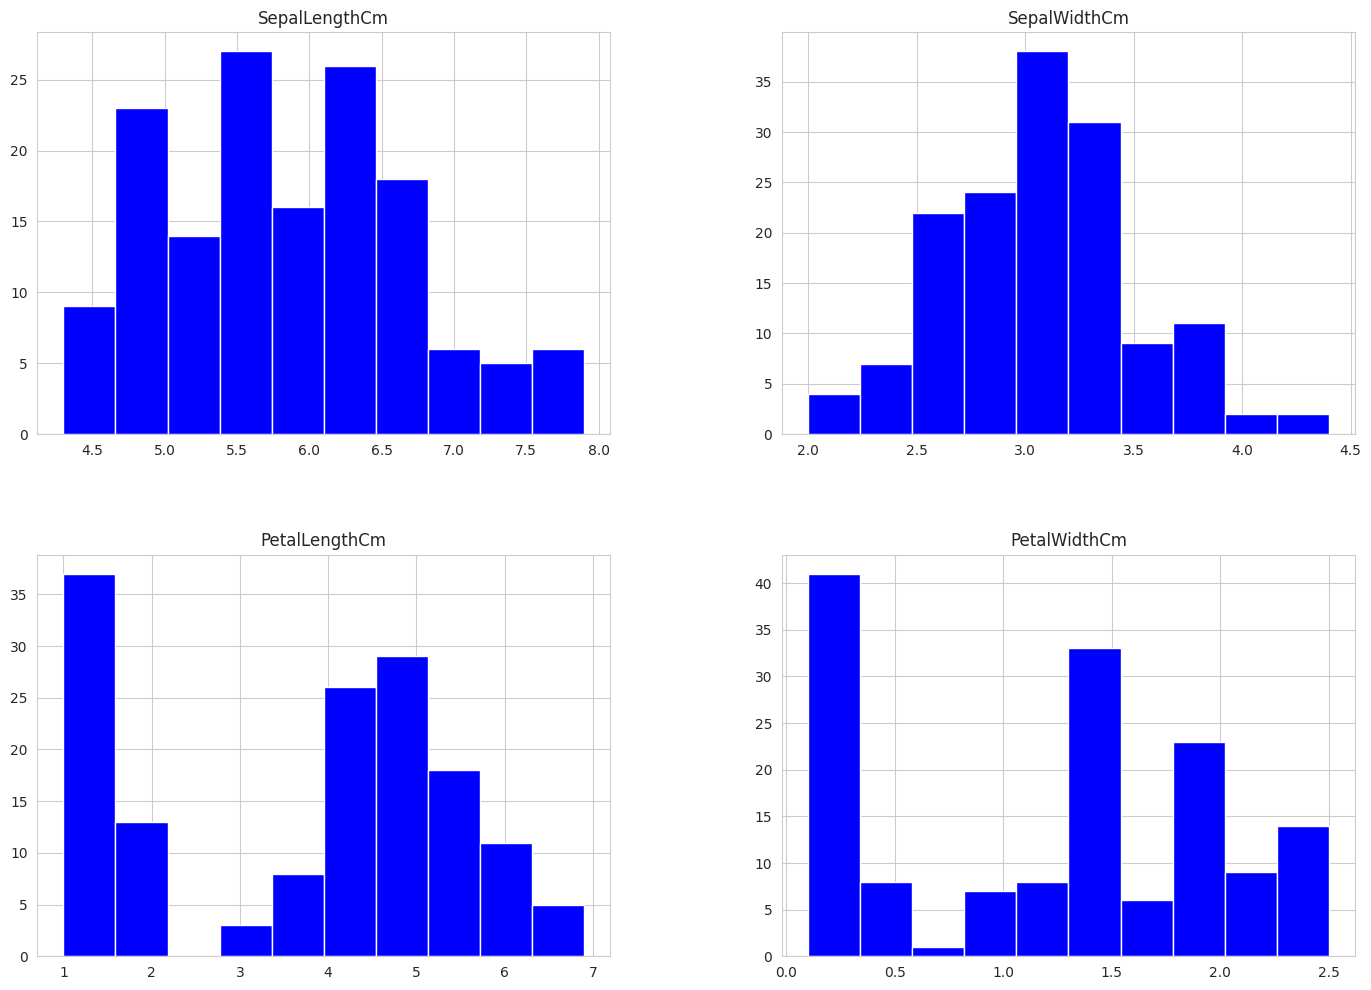

In [100]:
# Histogram of the dataset

dataframe.hist(figsize=(17,12),color='b')
plt.show()

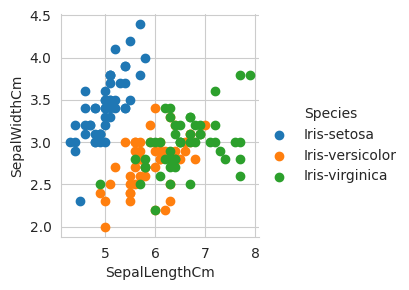

In [101]:
#Using Seaborn lib to visualized 2 features based on target variable.

sns.set_style('whitegrid')
sns.FacetGrid(dataframe, hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()

plt.show()

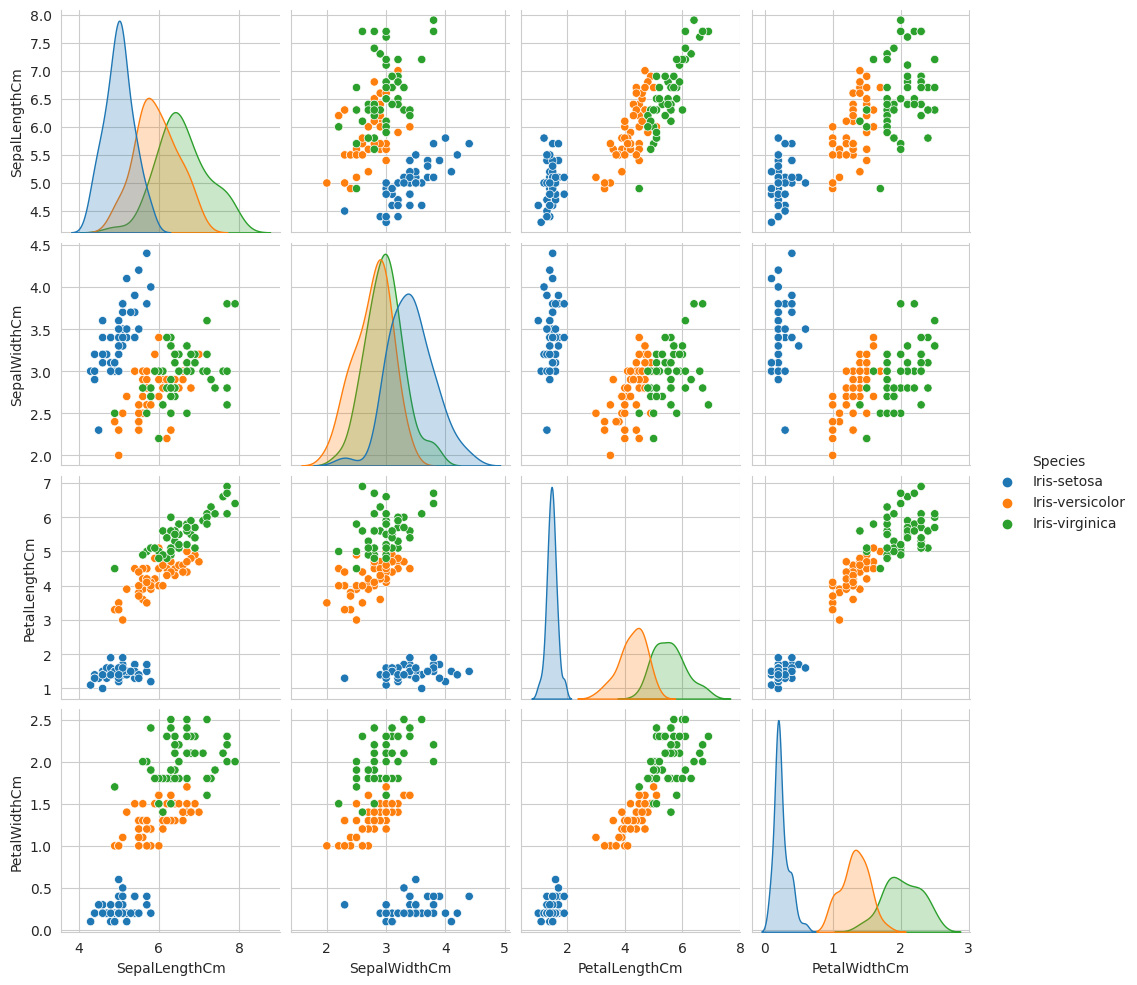

In [102]:
#Pair plot gives the relationship b/w all features distribution with each other..

sns.pairplot(dataframe, hue='Species')
plt.show()

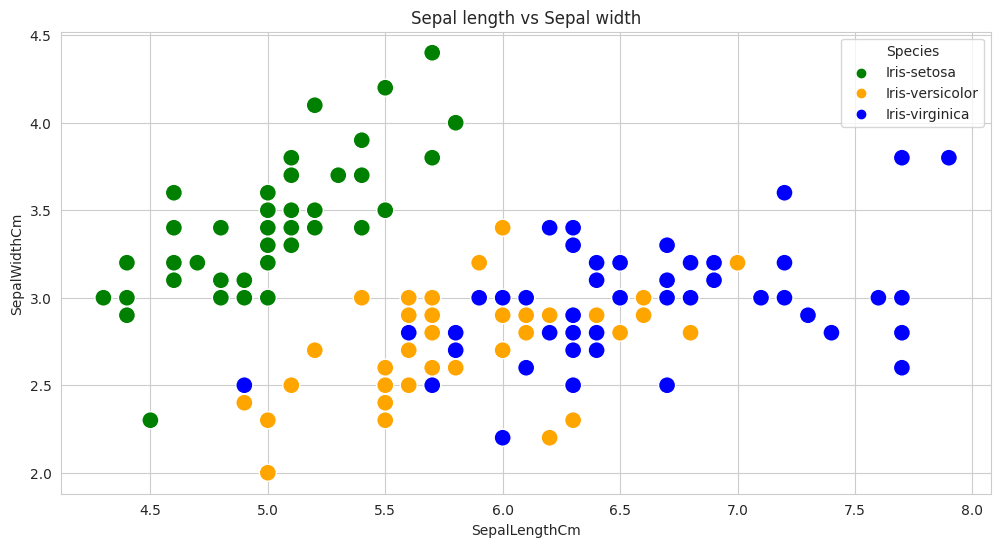

In [103]:
# ScatterPLot of Sepal length vs Sepal width

plt.figure(figsize=(12,6))
plt.title("Sepal length vs Sepal width")
sns.scatterplot(x=dataframe["SepalLengthCm"],
                y=dataframe["SepalWidthCm"],
                hue=dataframe["Species"],
                palette=["green","orange","blue"],
                s=150)
plt.show()

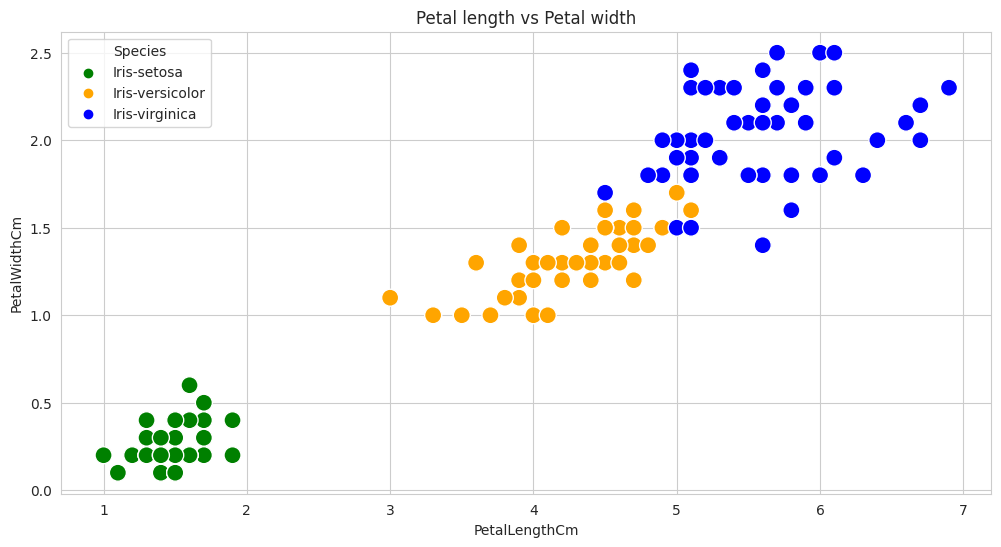

In [104]:
# ScaterPlot of Petal length vs Petal width

plt.figure(figsize=(12,6))
plt.title("Petal length vs Petal width")
sns.scatterplot(x=dataframe["PetalLengthCm"],
                y=dataframe["PetalWidthCm"],
                hue=dataframe["Species"],
                palette=["green","orange","blue"],
                s=150)
plt.show()

In [105]:
# Creating pie chart for Species

value = dataframe.Species.value_counts().values
names = dataframe.Species.value_counts().index
import plotly.express as px
fig = px.pie(dataframe, values=value, names=names, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [106]:
# Creating a Barchart for Species

import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(
            x=names, y=value,
            text=value,
            textposition='auto',
        )])

fig.show()

# Creating and Plotting Correlation Matrix

In [107]:
corr=dataframe.corr()

<ipython-input-107-ec06284c20d9>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [108]:
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<ipython-input-109-7423df163c81>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



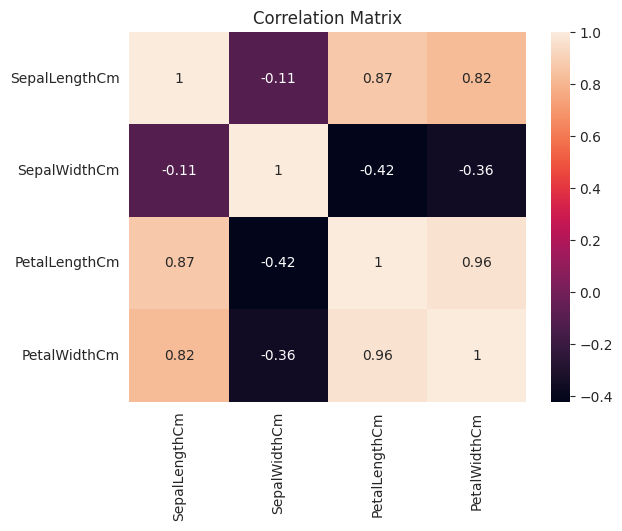

In [109]:
sns.heatmap(dataframe.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

# What is boxplot?
### A box and whisker plot is a way of summarizing a set of data measured on an interval scale. It is often used in explanatory data analysis. This type of graph is used to show the shape of the distribution, its central value, and its variability.

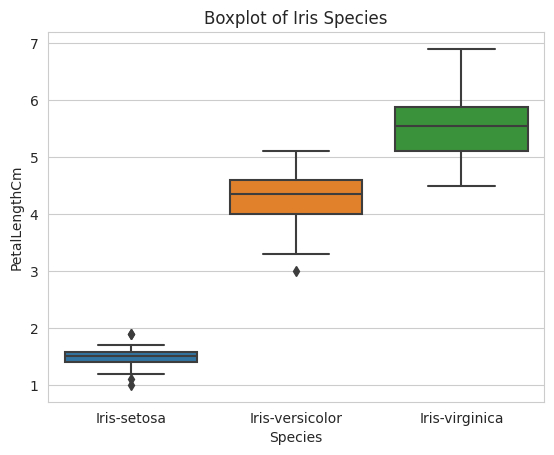

In [110]:
sns.boxplot(x="Species", y="PetalLengthCm", data=dataframe)
plt.title('Boxplot of Iris Species')
plt.show()

# What is Violinplot ?
### A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

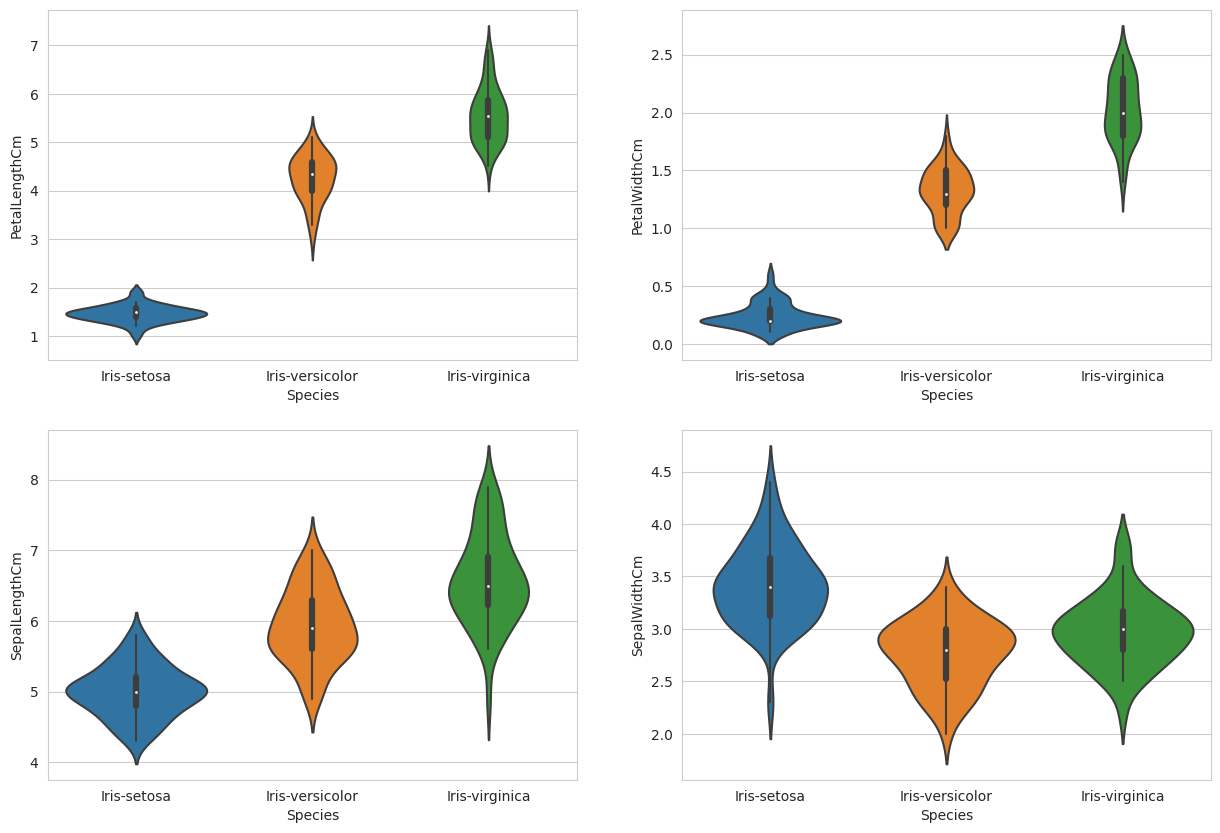

In [111]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=dataframe)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=dataframe)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=dataframe)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=dataframe)
plt.show()

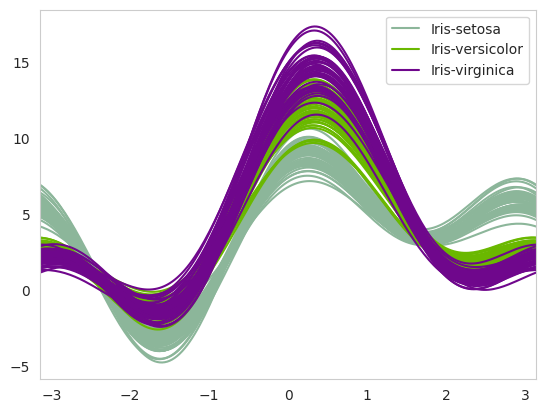

In [112]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
pd.plotting.andrews_curves(dataframe, "Species")
plt.show()

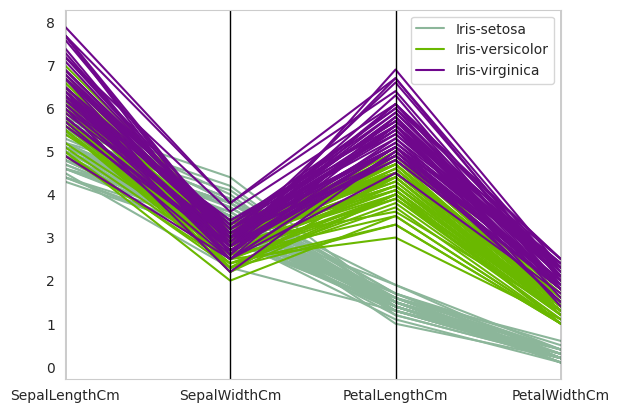

In [113]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
pd.plotting.parallel_coordinates(dataframe, "Species")
plt.show()

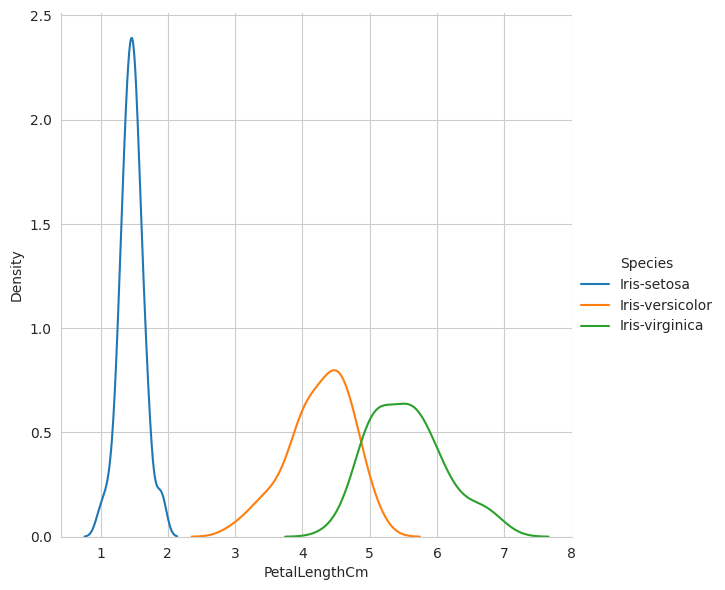

In [114]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(dataframe, hue="Species", height=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

# 6. Building Decision Tree Classifier
### First Split our data into Training and Testing

In [115]:
X = dataframe[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

In [116]:
y = dataframe[["Species"]]

In [117]:
X.shape

(150, 4)

In [118]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [119]:
y.shape

(150, 1)

In [120]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


# Here we are splitting our data using train_test_split()

In [121]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=dataframe.Species)

In [122]:
X_train.shape

(120, 4)

In [123]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
102,7.1,3.0,5.9,2.1
60,5.0,2.0,3.5,1.0
25,5.0,3.0,1.6,0.2
4,5.0,3.6,1.4,0.2
97,6.2,2.9,4.3,1.3
...,...,...,...,...
101,5.8,2.7,5.1,1.9
52,6.9,3.1,4.9,1.5
146,6.3,2.5,5.0,1.9
89,5.5,2.5,4.0,1.3


In [124]:
X_test.shape

(30, 4)

In [125]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
119,6.0,2.2,5.0,1.5
3,4.6,3.1,1.5,0.2
42,4.4,3.2,1.3,0.2
145,6.7,3.0,5.2,2.3
83,6.0,2.7,5.1,1.6
110,6.5,3.2,5.1,2.0
62,6.0,2.2,4.0,1.0
10,5.4,3.7,1.5,0.2
79,5.7,2.6,3.5,1.0
139,6.9,3.1,5.4,2.1


In [126]:
y_train.shape

(120, 1)

In [127]:
y_train

,Species
102,Iris-virginica
60,Iris-versicolor
25,Iris-setosa
4,Iris-setosa
97,Iris-versicolor
...,...
101,Iris-virginica
52,Iris-versicolor
146,Iris-virginica
89,Iris-versicolor


In [128]:
y_test.shape

(30, 1)

In [129]:
y_test

,Species
119,Iris-virginica
3,Iris-setosa
42,Iris-setosa
145,Iris-virginica
83,Iris-versicolor
110,Iris-virginica
62,Iris-versicolor
10,Iris-setosa
79,Iris-versicolor
139,Iris-virginica


# Building Decision Tree Classifier

In [130]:
dtc = DecisionTreeClassifier()

In [131]:
dtc

DecisionTreeClassifier()

In [132]:
type(dtc)

sklearn.tree._classes.DecisionTreeClassifier

In [133]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [134]:
y_predict=dtc.predict(X_test)

In [135]:
y_predict

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [136]:
print(len(y_predict))

30


# 7. Evaluation

In [137]:
a=accuracy_score(y_predict,y_test)

print('Accuracy Score =',a*100,'%')

Accuracy Score = 90.0 %


In [138]:
c=confusion_matrix(y_predict,y_test)
print(c)

[[10  0  0]
 [ 0  8  1]
 [ 0  2  9]]


In [139]:
pip install --upgrade scikit-learn

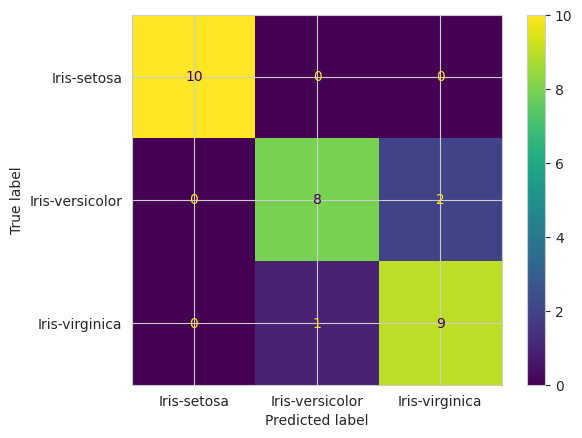

In [148]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test)
plt.show()

In [141]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.80      0.84        10
 Iris-virginica       0.82      0.90      0.86        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



# 8. Plotting Decision Tree Graph

In [142]:
pip install pydotplus

In [143]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

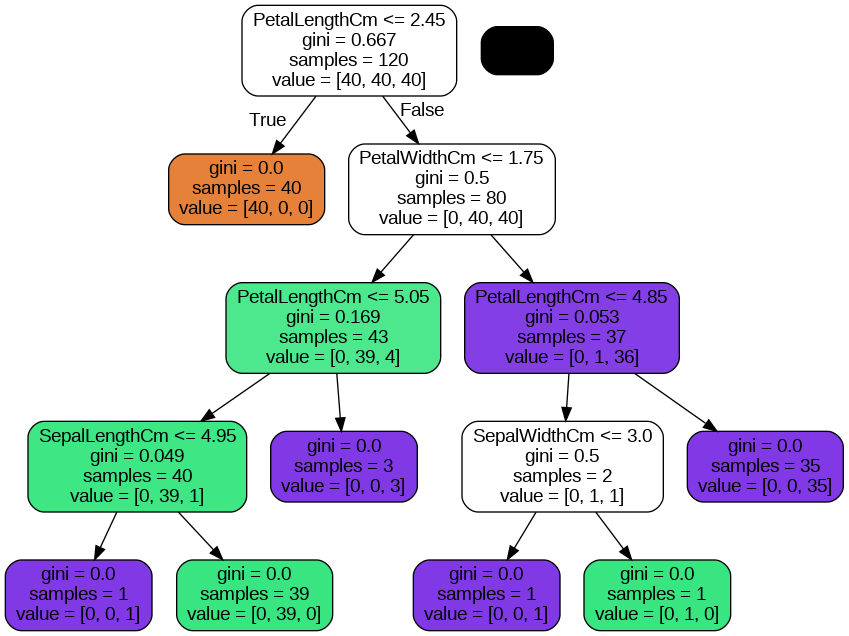

In [144]:
dot_data=StringIO()
export_graphviz(dtc,out_file=dot_data,feature_names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],
                filled=True,
                rounded=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())